参考：https://www.soinside.com/question/RVXmV6GAo5Hs4Kj4QrYXTe

In [7]:
from __future__ import absolute_import,division,print_function
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Hyper Parameters
learning_rate=0.01
training_epochs=1000
display_step=50

In [9]:
# Training Data
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [10]:
print(train_X.shape)
print(train_Y.shape)

(17,)
(17,)


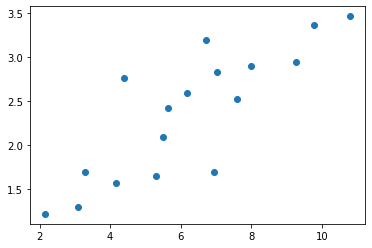

In [11]:
plt.scatter(train_X,train_Y)
plt.show()

In [12]:
print(np.size(train_X))
print(np.size(train_X[0]))
print(np.size(train_Y))
print(n_samples)

17
1
17
17


In [14]:
class Model(object):
    def __init__(self,x,y):
#         self.W = tf.Variable(tf.random.normal((1, 1)))
        self.W = tf.Variable(tf.random.normal((1,)))
        self.b = tf.Variable(tf.random.normal((1,)))
#         self.W = tf.Variable(np.random.randn(),name="weight")  
#         self.b = tf.Variable(np.random.randn(),name="bias")  
        
    def __call__(self,x):
        return self.W*x+self.b
    
def loss(y_pred,y_true):
#     return tf.reduce_sum(tf.square(y_pred-y_true)/(2*n_samples))
#     return tf.reduce_sum(tf.pow(y_pred-y_true,2)/(2*n_samples))
    return tf.reduce_sum(tf.keras.losses.mean_absolute_error(y_pred,y_true))/(2*n_samples)

In [15]:
model=Model(train_X,train_Y)

In [16]:
# optimizer=tf.optimizers.SGD(learning_rate)

def train(model,inputs,outputs):
    for step in range(1,training_epochs+1):
        with tf.GradientTape() as gt:
            current_loss=loss(model(inputs),outputs)

        gradients=gt.gradient(current_loss,[model.W,model.b])
        optimizer=tf.keras.optimizers.SGD(learning_rate)
        optimizer.apply_gradients(zip(gradients,[model.W,model.b]))
        
        if step % display_step == 0:
            print('step: %i, loss:%f, W:%f, b:%f'%(step,current_loss,model.W.numpy(),model.b.numpy()))  

In [17]:
train(model,train_X,train_Y)

step: 50, loss:0.009061, W:0.269843, b:0.537714
step: 100, loss:0.008742, W:0.280970, b:0.540414
step: 150, loss:0.008720, W:0.282223, b:0.541417
step: 200, loss:0.008718, W:0.282715, b:0.542281
step: 250, loss:0.008716, W:0.283207, b:0.543145
step: 300, loss:0.008714, W:0.283699, b:0.544010
step: 350, loss:0.008712, W:0.284190, b:0.544874
step: 400, loss:0.008710, W:0.284682, b:0.545738
step: 450, loss:0.008708, W:0.285174, b:0.546602
step: 500, loss:0.008706, W:0.285666, b:0.547467
step: 550, loss:0.008704, W:0.286157, b:0.548331
step: 600, loss:0.008702, W:0.286649, b:0.549195
step: 650, loss:0.008700, W:0.287141, b:0.550059
step: 700, loss:0.008698, W:0.287633, b:0.550924
step: 750, loss:0.008696, W:0.287786, b:0.551753
step: 800, loss:0.008695, W:0.287601, b:0.552549
step: 850, loss:0.008694, W:0.287416, b:0.553344
step: 900, loss:0.008693, W:0.287231, b:0.554139
step: 950, loss:0.008691, W:0.287384, b:0.554968
step: 1000, loss:0.008690, W:0.287199, b:0.555764


In [18]:
print(model.W)
print(model.b)
print(model.W*train_X+model.b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.28719926], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.5557636], dtype=float32)>
tf.Tensor(
[1.5035212 1.8194404 2.1353595 2.4828706 2.5460544 1.7528101 3.3642855
 2.3312294 2.7356062 1.1781244 2.5782208 3.654931  2.0816534 2.8524961
 2.1795883 3.218101  1.4460813], shape=(17,), dtype=float32)


No handles with labels found to put in legend.


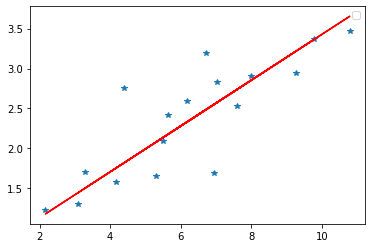

In [19]:
plt.plot(train_X,train_Y,'*')
plt.plot(train_X,np.array(model.W*train_X+model.b),'r')
plt.legend()
plt.show()